In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [67]:
def hot_enocding(x,column):
    encoding_column = pd.get_dummies(x[column], prefix=column)
    print(encoding_column.columns)
    x = x.drop(column, axis=1)
    x = x.join(encoding_column)
    return x
    
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [68]:
x = pd.read_csv("credit_score_clean.csv")

In [69]:
unique = x['Type_of_Loan'].unique()
res =set()
# create column for every unique value
for i in unique:
    split_unique = i.split(",")
    for j in split_unique:
        strpe_replace = j.replace("and","")
        stripe_j = strpe_replace.strip()
        res.add(stripe_j)
        
for i in res:
    x[i] = x['Type_of_Loan'].str.contains(i)
    
x = x.drop(['Type_of_Loan'], axis=1)


In [70]:
x["Payment_of_Min_Amount"]=custom_encoding(x["Payment_of_Min_Amount"])


In [71]:
x["Credit_Mix"]= custom_encoding(x["Credit_Mix"])


In [72]:
x=hot_enocding(x,"Payment_Behaviour")



Index(['Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')


In [73]:
x=hot_enocding(x,"Occupation")


Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer'],
      dtype='object')


In [74]:
x.to_csv("credit_score_clean_encoded.csv",index=False)

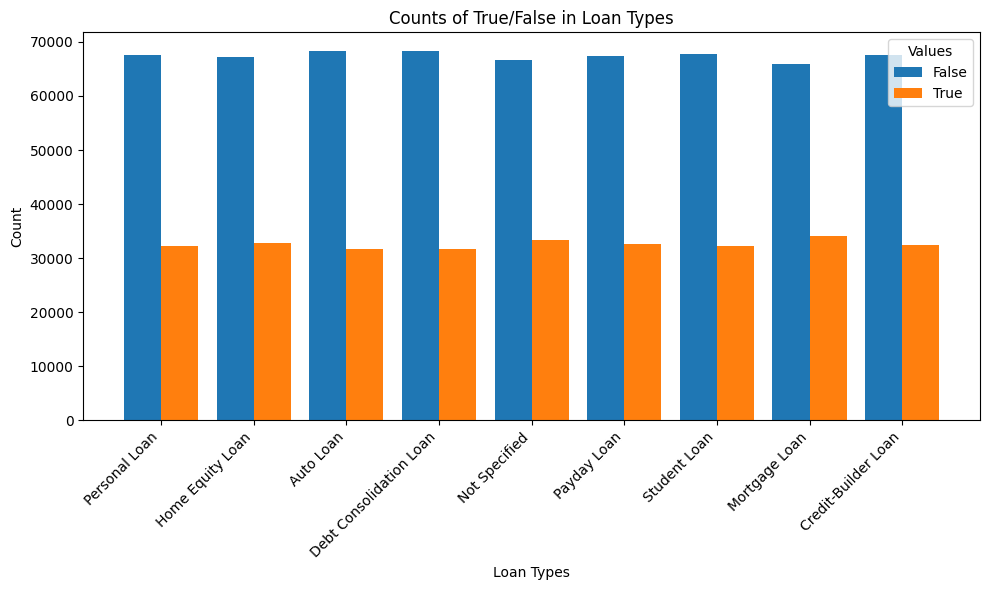

In [75]:
loan = ['Personal Loan', 'Home Equity Loan', 'Auto Loan', 'Debt Consolidation Loan', 'Not Specified', 'Payday Loan', 'Student Loan', 'Mortgage Loan', 'Credit-Builder Loan']
x_loan = x[loan]
boolean_counts = x_loan.apply(pd.Series.value_counts)

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x_len = np.arange(len(loan))
width = 0.4

ax.bar(x_len - width/2, boolean_counts.loc[False], width, label='False')
ax.bar(x_len + width/2, boolean_counts.loc[True], width, label='True')

ax.set_title('Counts of True/False in Loan Types')
ax.set_xlabel('Loan Types')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(loan, rotation=45, ha='right')
ax.legend(title='Values', loc='upper right')

plt.tight_layout()
plt.show()

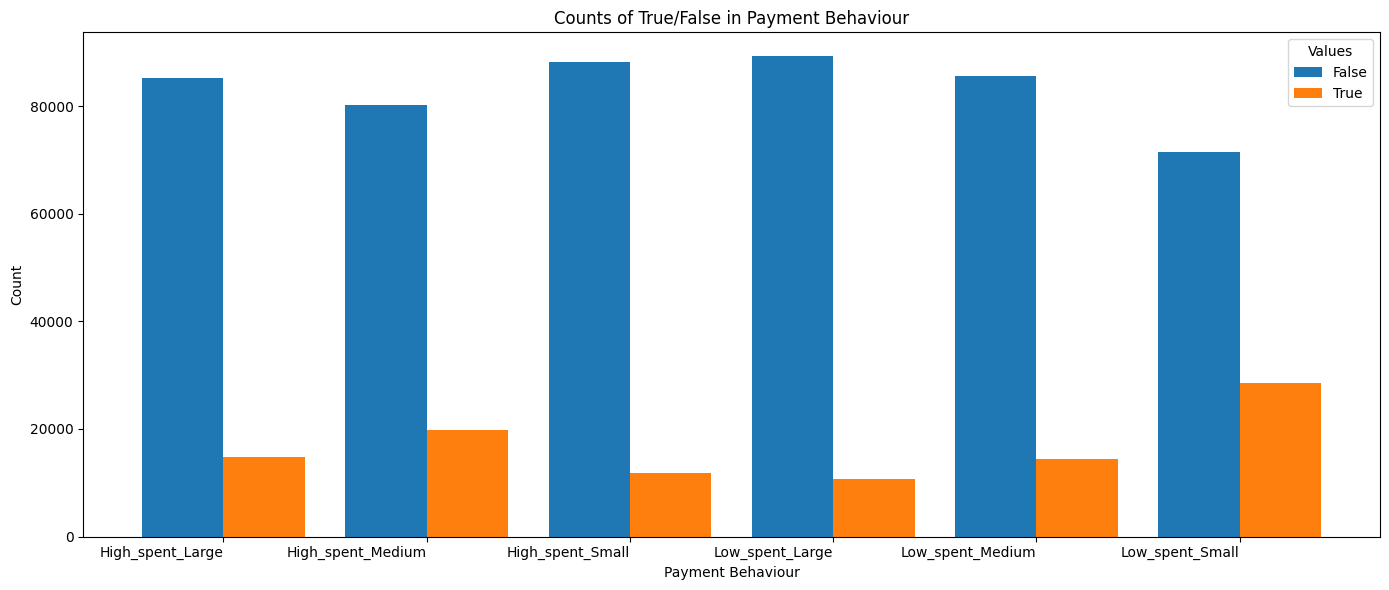

In [84]:
pehav = ['Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments']

x_loan = x[pehav]
replace_pehave = [x.replace('Payment_Behaviour_', '') for x in pehav]
replace_pehave = [x.replace('_value_payments', '') for x in replace_pehave]
pehav = replace_pehave
# replace all Payment_Behaviour_ and _value_payments with empty string
boolean_counts = x_loan.apply(pd.Series.value_counts)

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(14, 6))
x_len = np.arange(len(pehav))
width = 0.4

ax.bar(x_len - width/2, boolean_counts.loc[False], width, label='False')
ax.bar(x_len + width/2, boolean_counts.loc[True], width, label='True')

ax.set_title('Counts of True/False in Payment Behaviour')
ax.set_xlabel('Payment Behaviour')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(pehav, ha='right')
ax.legend(title='Values', loc='upper right')

plt.tight_layout()
plt.show()

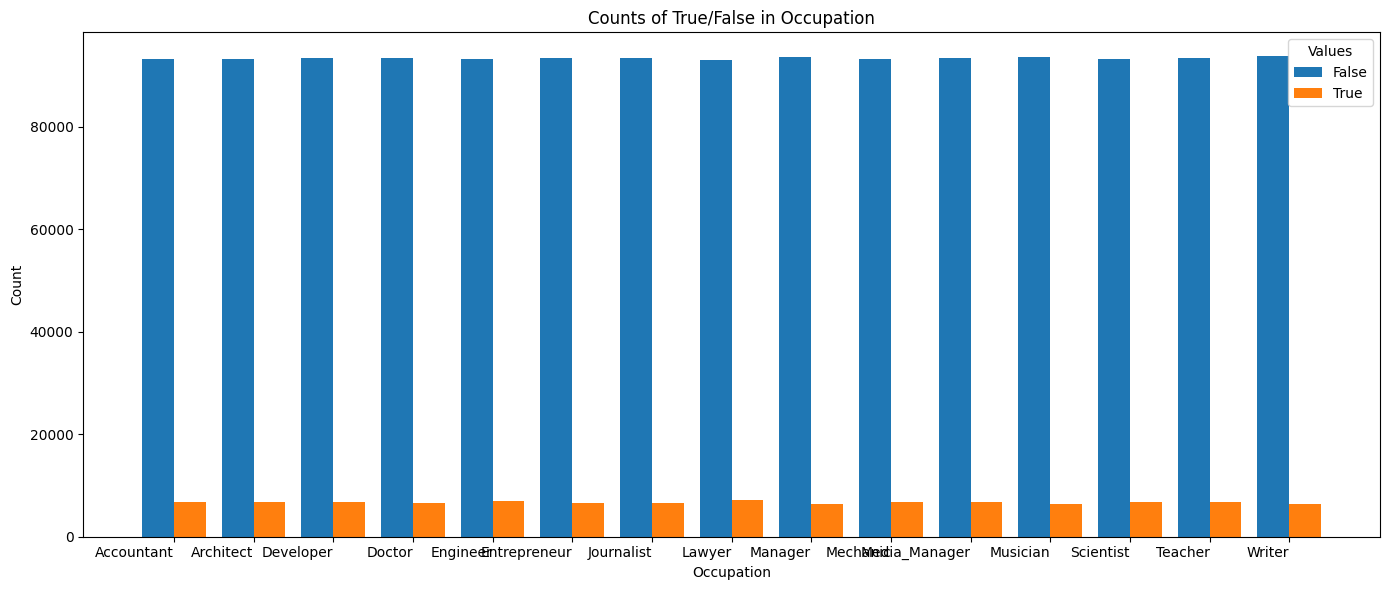

In [86]:
pehav = ['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']

x_loan = x[pehav]
replace_pehave = [x.replace('Occupation_', '') for x in pehav]
pehav = replace_pehave
# replace all Payment_Behaviour_ and _value_payments with empty string
boolean_counts = x_loan.apply(pd.Series.value_counts)

# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(14, 6))
x_len = np.arange(len(pehav))
width = 0.4

ax.bar(x_len - width/2, boolean_counts.loc[False], width, label='False')
ax.bar(x_len + width/2, boolean_counts.loc[True], width, label='True')

ax.set_title('Counts of True/False in Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(pehav, ha='right')
ax.legend(title='Values', loc='upper right')

plt.tight_layout()
plt.show()

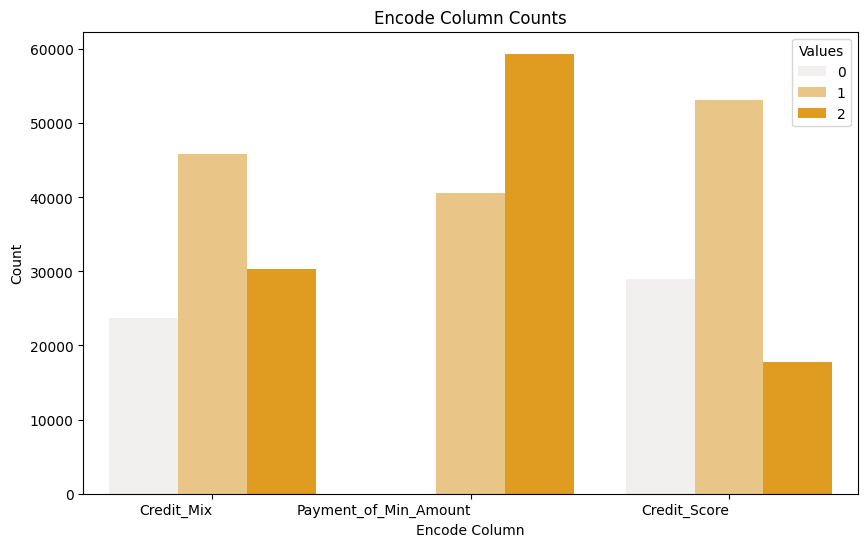

In [76]:
encode_column = ['Credit_Mix','Payment_of_Min_Amount','Credit_Score']
# Create a clustered bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x_len = np.arange(len(encode_column))
width = 0.4
sns.countplot(x="variable", hue="value", data=pd.melt(x[encode_column]),color="orange")
ax.set_title("Encode Column Counts")
ax.set_xlabel('Encode Column')
ax.set_ylabel('Count')
ax.set_xticks(x_len)
ax.set_xticklabels(encode_column, ha='right')
ax.legend(title='Values', loc='upper right')
